### Dataset link: https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setting up the working directory

In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Bank Exit Prediction')

### Import the library

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading the dataset

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
# first 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# shape of the dataset
df.shape

(10000, 14)

In [7]:
# checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# dropping the unwanted columns
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
for column in df.columns:
  if df[column].dtype == object:
    df[column] = encoder.fit_transform(df[column])

### Splitting into independent & dependent feature

In [12]:
x = df.drop(columns = ['Exited'], axis = 1)
y = df['Exited']

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Artificial Neural Network

In [16]:
# importing the deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score

In [17]:
clf = Sequential()
clf.add(Dense(input_dim=10,units=64,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [18]:
# compiling the model
clf.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
# training the model
history = clf.fit(X_train, y_train, epochs = 500, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/500
125/125 [==============================] - 2s 7ms/step - loss: 0.6175 - accuracy: 0.7111 - val_loss: 0.4719 - val_accuracy: 0.7970
Epoch 2/500
125/125 [==============================] - 1s 4ms/step - loss: 0.5134 - accuracy: 0.7855 - val_loss: 0.4513 - val_accuracy: 0.7970
Epoch 3/500
125/125 [==============================] - 1s 4ms/step - loss: 0.4954 - accuracy: 0.7914 - val_loss: 0.4404 - val_accuracy: 0.7975
Epoch 4/500
125/125 [==============================] - 1s 4ms/step - loss: 0.4734 - accuracy: 0.7944 - val_loss: 0.4325 - val_accuracy: 0.7990
Epoch 5/500
125/125 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7981 - val_loss: 0.4260 - val_accuracy: 0.8010
Epoch 6/500
125/125 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8024 - val_loss: 0.4194 - val_accuracy: 0.8050
Epoch 7/500
125/125 [==============================] - 1s 4ms/step - loss: 0.4445 - accuracy: 0.8066 - val_loss: 0.4103 - val_accuracy: 0.8105

In [20]:
predicted = clf.predict(X_test)

predicted_label = np.where(predicted > 0.5, 1, 0)

63/63 [==============================] - 0s 1ms/step


In [21]:
accuracy = accuracy_score(y_test, predicted_label)
print('Accuracy : ',accuracy)

Accuracy :  0.852


### Saving the model

In [22]:
clf.save('BankExit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Prediction

In [23]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.0,1,1,1,101348.88,1


In [24]:
a =clf.predict([[619, 0 ,0, 42, 2, 0.0, 1, 1, 1, 101348.88]])

if a==[[0]]:
    print('Exited')
else:
    print('Not Exited')

1/1 [==============================] - 0s 34ms/step
Not Exited


### Plots

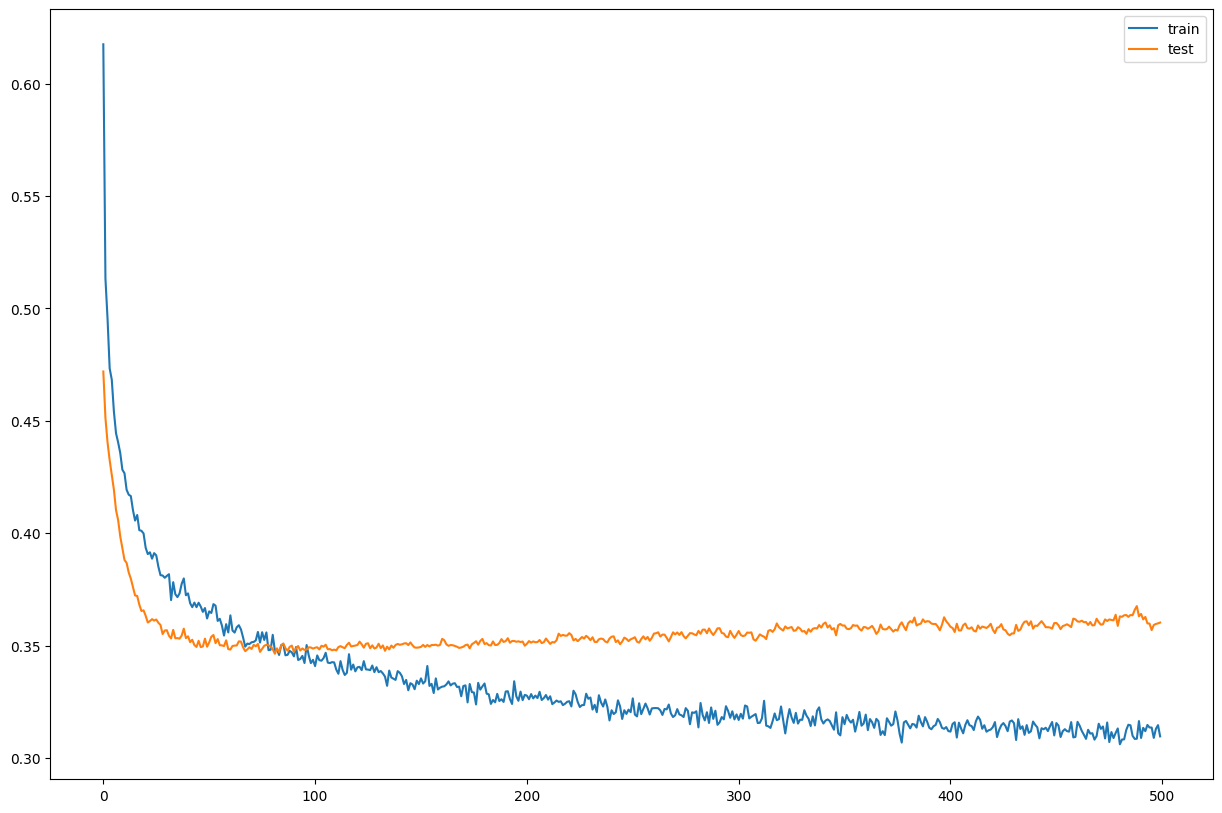

In [25]:
# Loss curve
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

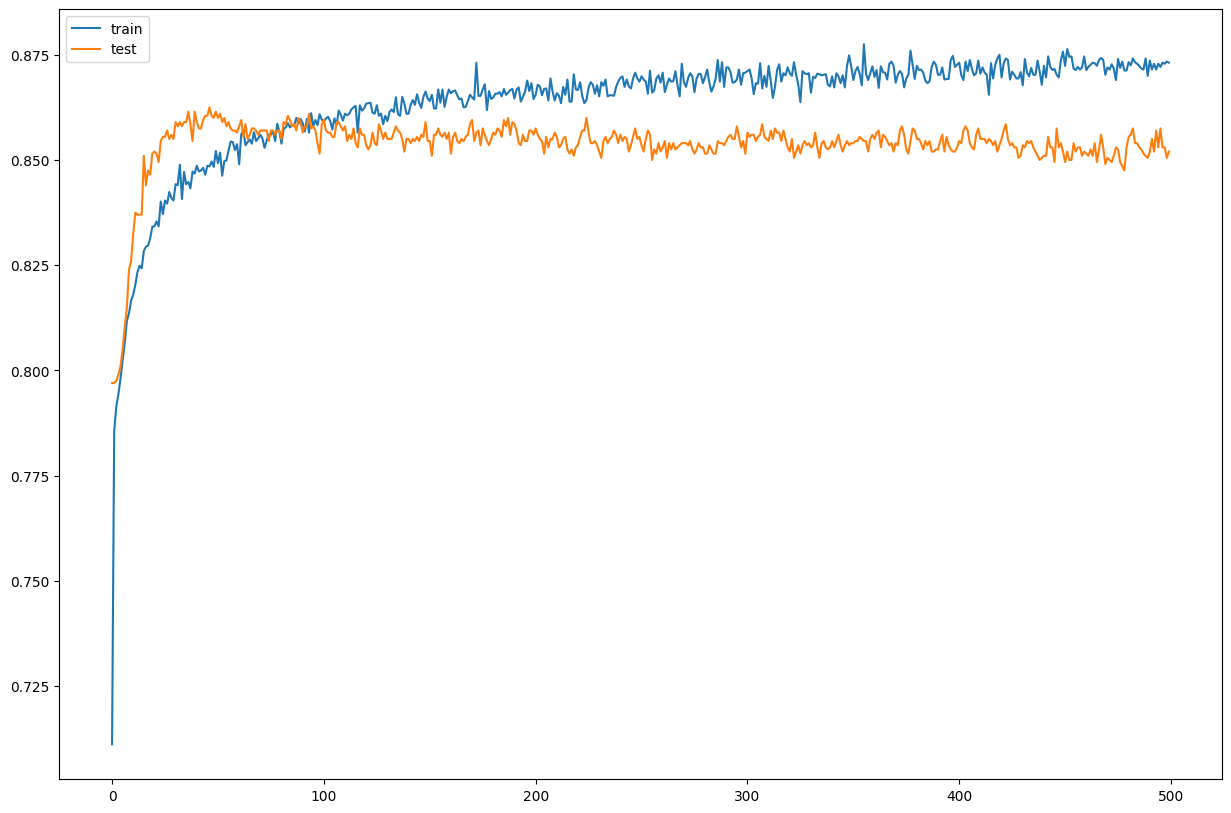

In [26]:
# Accuracy curve
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()